 # Predict the traffic on a new mode of transport.
 
#### Problem Statement
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.
 

Dataset - https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

Tutorial - https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+TS_101+TS_term1/info



#### Lets divide the work in 3 parts
1. Understanding Time Series
2. Data Understanding and Exploration
3. Time Series Forecasting using different methods


## 1. Understanding Time Series

Time Series is generally data which is collected over time and is dependent on it.

Time series data can use in forcasting sales number for the next year, website traffic, count of traffic, number of calls received, etc. 


### Components of a Time Series
#### 1. Trend
    Trend is a general direction in which something is developing or changing. 
    So we see an increasing trend in this time series. We can see that the passenger count is increasing with the number of years.


#### 2. Seasonality
    The pattern is repeating at regular time interval. 
    
    
### Difference between a time series and regression problem
1. The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations (Xs) are independent doesn’t hold in this case.

2. Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.


So, predicting a time series using regression techniques is not a good approach.

## 2. Understanding Data 

In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Data/Train.csv")
test=pd.read_csv("Data/Test.csv")

train_original=train.copy()
test_original=test.copy()

In [3]:
print('Shape   :',train.shape, test.shape)
print('Columns :',train.columns)

Shape   : (18288, 3) (5112, 2)
Columns : Index(['ID', 'Datetime', 'Count'], dtype='object')


In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

In [7]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

#### Date Feature Extraction

In [8]:
for i in (train, test):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [9]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [10]:
train['day_of_week']=train['Datetime'].dt.dayofweek
test['day_of_week']=train['Datetime'].dt.dayofweek 
# weekend yes no

#### EDA 
By plotting each column against 'Count' we will idenfity if any Trend/ seasonality present

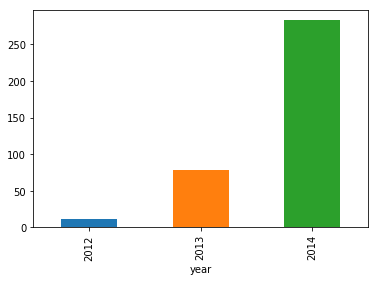

In [11]:
train.groupby('year')['Count'].mean().plot.bar()

#### Observation from above plot : Traffic will increase as the years pass by

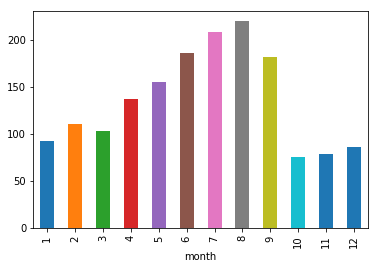

In [12]:
train.groupby('month')['Count'].mean().plot.bar()


#### Observation from above plot : Traffic will be high from May to October

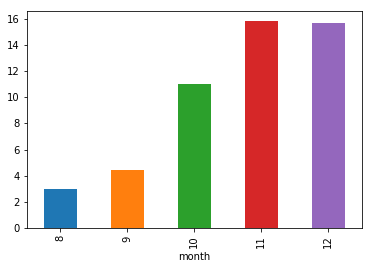

In [13]:
train[train.year==2012].groupby('month')['Count'].mean().plot.bar()

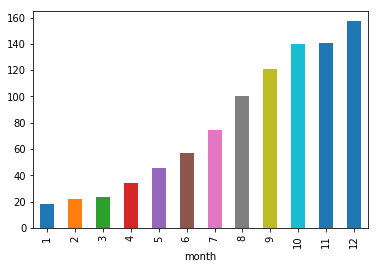

In [14]:
train[train.year==2013].groupby('month')['Count'].mean().plot.bar()

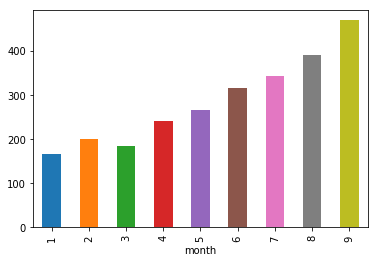

In [15]:
train[train.year==2014].groupby('month')['Count'].mean().plot.bar()

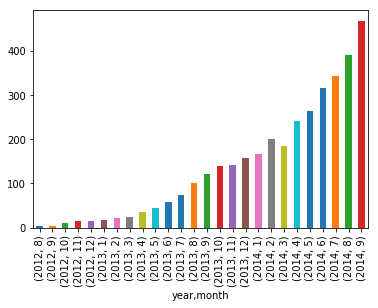

In [16]:
train.groupby(['year', 'month'])['Count'].mean().plot.bar()

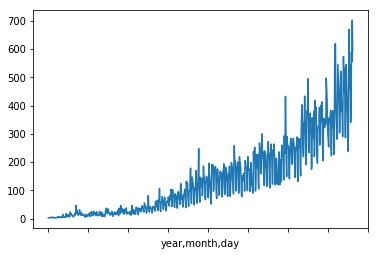

In [17]:
train.groupby(['year', 'month','day'])['Count'].mean().plot.line()

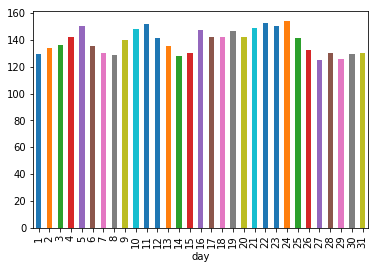

In [18]:
train.groupby('day')['Count'].mean().plot.bar()

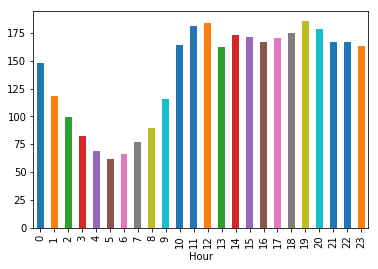

In [19]:
train.groupby('Hour')['Count'].mean().plot.bar()

#### Observation from above plot : Traffic during the night hours is low

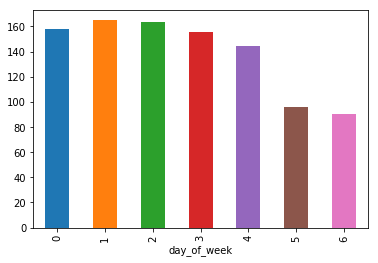

In [20]:
train.groupby('day_of_week')['Count'].mean().plot.bar()

#### Observation from above plot : Traffic on weekdays is more

From EDA we have observed following things
    1. Traffic will increase as the years pass by
    2. Traffic will be high from May to October
    3. Traffic during the night hours is low (12AM to 9 AM)
    4. Traffic on weekdays is more